In [3]:
# Trying to experiment with reading pickle files
import pickle
import os
import numpy as np

# Loading data and store it to variables

In [4]:
# Root dir to the project, adjust this your own project path
rootdir = 'C:/Users/User/Downloads/angewandte-ki-cog-village/data/training/'

# data event variable is sensor dict data
# data label event variable is based on the file name, extracted with string split
data             = []
data_label       = []
data_label_text  = []


for subdir, dirs, files in os.walk(rootdir):
    for fl in files:
        if fl.endswith('.pkl'):
            # string split for event labelling
            str_arr = fl.split('_')
            label   = str_arr[1]

            # read data and append it to variable
            infile = open((rootdir + fl),'rb')
            new_dict = pickle.load(infile, encoding='latin1')

            data.append(new_dict)
            data_label.append(new_dict['label'])
            data_label_text.append(label)


# Reading data

In [5]:
# Read data data[index] example
# print(data[500])

# Get keys list
# print(data[500].keys())

# Get key value inside dict object
# print(data[500]['subject'])
# print(data[500]['Magnetometer'])
# print(data[500]['label'])

# Get shape
# print(data[500]['Magnetometer'].shape)

# Get label
# print(data_label)

# Data structure

In [6]:
selected_data = data[0]
keys = data[0].keys()

for key in keys:
    print(key,':',type(selected_data[key]))
    if type(selected_data[key]) is np.ndarray:
        print(selected_data[key].shape)
    else:
        print(selected_data[key])


Magnetometer : <class 'numpy.ndarray'>
(245, 3)
JinsBlinkSpeed : <class 'numpy.ndarray'>
(101, 1)
rightHand : <class 'bool'>
False
Accelerometer : <class 'numpy.ndarray'>
(982, 3)
MSGyroscope : <class 'numpy.ndarray'>
(307, 3)
MSAccelerometer : <class 'numpy.ndarray'>
(307, 3)
JinsGyroscope : <class 'numpy.ndarray'>
(101, 3)
Gravity : <class 'numpy.ndarray'>
(1001, 3)
label : <class 'int'>
0
LinearAccelerometer : <class 'numpy.ndarray'>
(994, 3)
executionId : <class 'int'>
0
session : <class 'int'>
1
JinsAccelerometer : <class 'numpy.ndarray'>
(101, 3)
JinsBlinkStrength : <class 'numpy.ndarray'>
(101, 1)
JinsEyeMovement : <class 'numpy.ndarray'>
(101, 4)
Gyroscope : <class 'numpy.ndarray'>
(984, 3)
subject : <class 'int'>
1


# Plotting testing

In [7]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Magnetometer

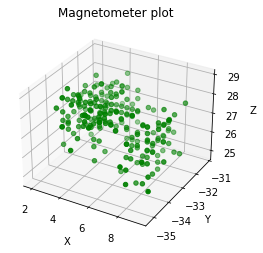

In [8]:
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

magnetometer = data[0]['Magnetometer']

x_vals = magnetometer[:, 0]
y_vals = magnetometer[:, 1]
z_vals = magnetometer[:, 2]

ax.scatter(x_vals, y_vals, z_vals, c='g')

ax.set_title('Magnetometer plot')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## Accelerometer with comparing activity example

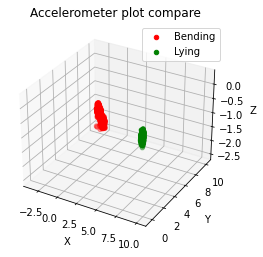

In [9]:
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Data index 0 is bending, label = 0
accelerometerOne = data[0]['Accelerometer']

x_vals_one = accelerometerOne[:, 0]
y_vals_one = accelerometerOne[:, 1]
z_vals_one = accelerometerOne[:, 2]

# Data index 20 is drink, label = 16
accelerometerTwo = data[20]['Accelerometer']

x_vals_two = accelerometerTwo[:, 0]
y_vals_two = accelerometerTwo[:, 1]
z_vals_two = accelerometerTwo[:, 2]

ax.scatter(x_vals_one, y_vals_one, z_vals_one, c='r', label = 'Bending')
ax.scatter(x_vals_two, y_vals_two, z_vals_two, c='g', label = 'Lying')

ax.set_title('Accelerometer plot compare')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.legend()

plt.show()

## Trying to plot plotable data of an activity e.g. Bending

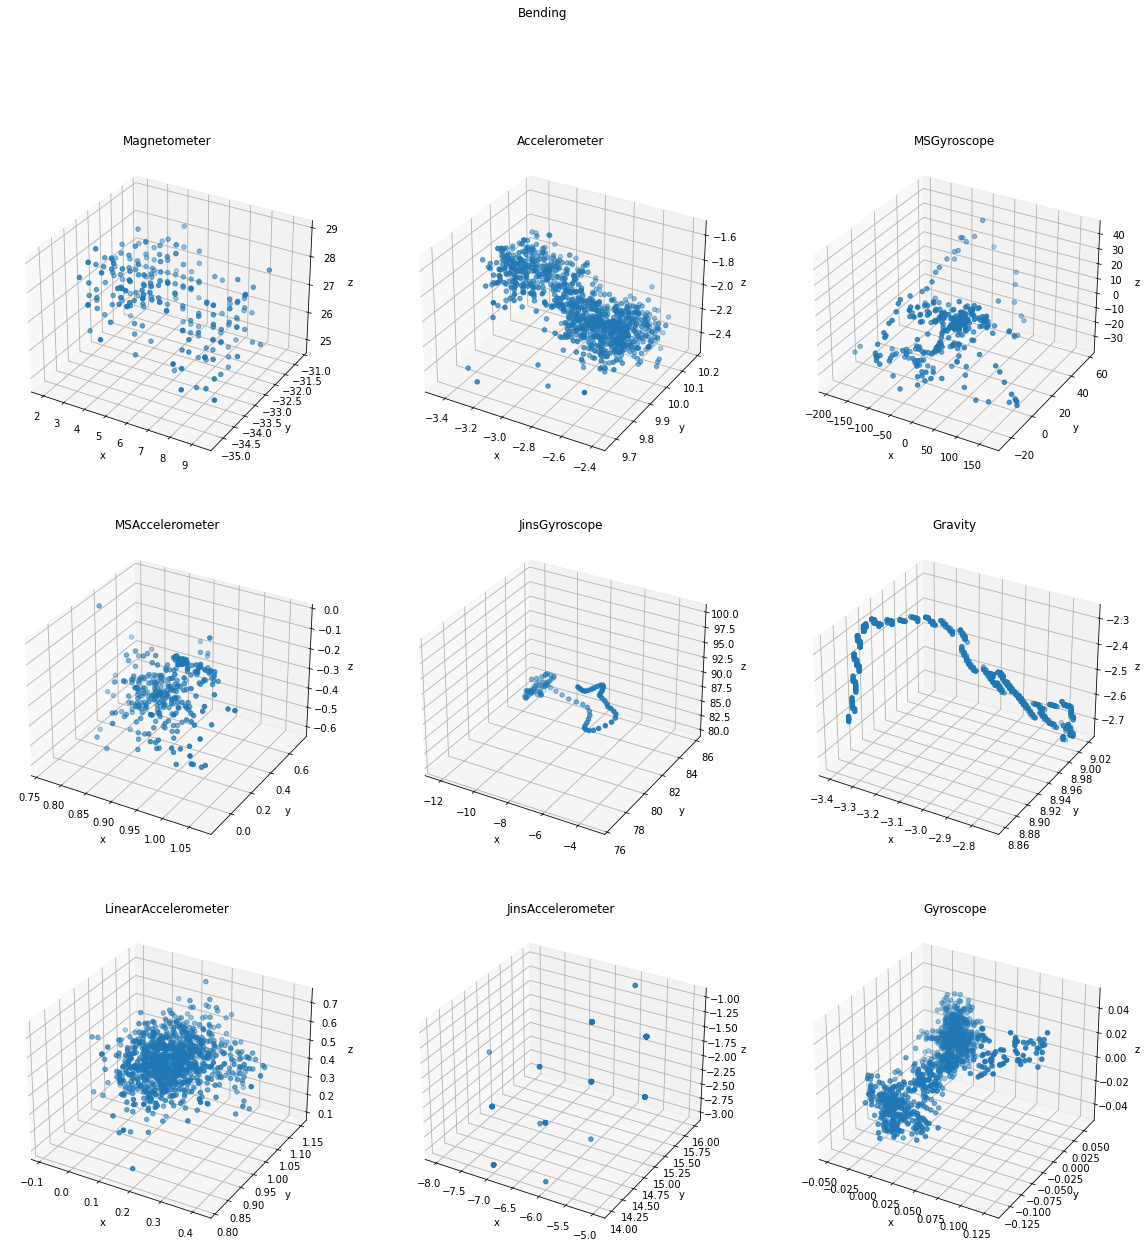

In [10]:
# TODO find out how to plot (n, 4) JinsEyeMovement sensor data - maybe through reshape?
# TODO find out how to plot (n, 1) JinsBlinkStrength sensor data 

selected_data = data[0]
keys = data[0].keys()

# Prepare the plot
fig = plt.figure(figsize=(20,20))
fig.suptitle('Bending')
ax  = dict()

index = 1

for key in keys:
    if type(selected_data[key]) is np.ndarray:
        # If data is 3d array type
        if selected_data[key].shape[1] == 3:

            x_vals = selected_data[key][:,0]
            y_vals = selected_data[key][:,1]
            z_vals = selected_data[key][:,2]

            ax[index] = fig.add_subplot(3, 3, index, projection='3d')

            ax[index].set_title(key)
            ax[index].set_xlabel('x')
            ax[index].set_ylabel('y')
            ax[index].set_zlabel('z')

            ax[index].scatter(x_vals, y_vals, z_vals)

            index = index + 1



# Test concatenate data per activity

In [11]:
# Root dir to the project, adjust this your own project path
rootdir = 'C:/Users/User/Downloads/angewandte-ki-cog-village/data/training/'

# data event variable is sensor dict data
# data label event variable is based on the file name, extracted with string split
data             = []
data_label       = []
data_label_text  = []


for subdir, dirs, files in os.walk(rootdir):
    for fl in files:
        if fl.endswith('.pkl'):
            # string split for event labelling
            str_arr = fl.split('_')
            label   = str_arr[1]

            # read data and append it to variable
            infile = open((rootdir + fl),'rb')
            new_dict = pickle.load(infile, encoding='latin1')

            data.append(new_dict)
            data_label.append(new_dict['label'])
            data_label_text.append(label)

In [12]:
from collections import defaultdict

keys = list(data[0].keys())

# Remove duplicates
unique_data_label = list(set(data_label))

activity_multi_array = []
activity_multi_label = unique_data_label

for label in unique_data_label:
    data_total = defaultdict(list)
    
    for dt in data:
        # Due to some data don't have all keys
        keys = list(dt.keys())
        if dt['label'] == label:
            for k in keys:
                data_total[k].append(dt[k])
                
    for k in keys:
        data_total[k] = np.vstack(data_total[k])
    
    activity_multi_array.append(data_total)



In [21]:
import numpy as np
import pandas as pd

arr = []
keys = [
    'Magnetometer', 
    'Accelerometer', 
    'LinearAccelerometer', 
    'JinsGyroscope', 
    'Gravity', 
    'MSAccelerometer',
    'JinsAccelerometer',
    'MSGyroscope',
    'Gyroscope',
    'label'
]

ary = []
for dt in data:
    internal = []
    for key in keys[:-1]:
        feature = dt[key]
        for column in feature.T:
            internal.append(np.mean(column))
            internal.append(np.var(column))
    internal.append(dt["label"])
    ary.append(internal)

In [27]:
df = pd.DataFrame(ary)

# Name df columns, so it's more clear
df_columns = []

# Iterate through except last item 'label'
for key in keys[:-1]:
    df_columns.append('{} X (mean)'.format(key))
    df_columns.append('{} X (var)'.format(key))
    df_columns.append('{} Y (mean)'.format(key))
    df_columns.append('{} Y (var)'.format(key))
    df_columns.append('{} Z (mean)'.format(key))
    df_columns.append('{} Z (var)'.format(key))

df_columns.append('label')

df.columns = df_columns

df

,Magnetometer X (mean),Magnetometer X (var),Magnetometer Y (mean),Magnetometer Y (var),Magnetometer Z (mean),Magnetometer Z (var),Accelerometer X (mean),Accelerometer X (var),Accelerometer Y (mean),Accelerometer Y (var),...,MSGyroscope Y (var),MSGyroscope Z (mean),MSGyroscope Z (var),Gyroscope X (mean),Gyroscope X (var),Gyroscope Y (mean),Gyroscope Y (var),Gyroscope Z (mean),Gyroscope Z (var),label
0,4.991582,3.368823,-32.884439,0.634716,26.872449,0.663769,-2.884869,0.060364,9.986173,0.004628,...,171.479537,-1.533626,191.691907,0.009184,0.000828,-0.020094,0.003160,-0.001689,0.000279,0
1,4.999238,7.892133,-40.103659,1.256309,-1.536331,3.767433,-3.613416,0.899924,9.741128,0.123495,...,166.629941,-6.654783,168.065691,0.034110,0.013949,-0.048642,0.011850,-0.051924,0.014586,0
2,8.244621,33.212013,-37.640113,1.081339,9.581711,26.765016,-3.584641,0.302535,8.994270,0.097725,...,419.128829,5.229503,343.253470,0.093957,0.046750,-0.293630,0.127931,0.147183,0.054584,0
3,8.289634,0.321695,-39.676829,0.765797,3.122967,1.000790,-3.755605,0.028667,9.381834,0.004278,...,594.963733,1.653889,700.469946,0.006140,0.000829,0.027012,0.004228,-0.002326,0.000448,0
4,18.582317,0.217309,-39.456047,0.764281,-7.030488,0.467312,-1.897469,0.007615,10.432590,0.002224,...,42.592777,0.289933,41.263543,0.000696,0.000156,0.001241,0.001263,-0.002282,0.000066,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,7.735204,161.662281,-40.539796,17.689041,5.139286,130.851199,-0.059114,4.431167,10.254099,5.987673,...,1334.647617,-3.513371,6751.058461,0.076370,1.687978,-0.714272,1.881797,0.225244,0.229658,5
70,-9.915142,36.056030,-38.599593,22.883152,13.914888,202.051969,-0.334148,3.729964,10.174219,6.963552,...,1761.536801,4.368509,14940.844522,0.052872,1.428611,0.621775,1.099905,-0.067441,0.104611,5
71,16.424595,7.723027,-39.404858,8.020617,7.795547,75.613120,0.097665,2.888897,10.276005,4.800974,...,1397.277968,-2.261507,2986.817937,0.036673,1.196191,-0.110274,1.200962,0.100566,0.147778,5
72,16.982540,8.874426,-39.111336,8.218943,6.743927,108.311894,-0.004759,2.599428,10.182549,2.682713,...,15541.307256,-5.583288,26301.020665,0.000764,0.638034,-0.228669,1.170908,0.099312,0.108682,5


# Testing random forest classifier with Magnetometer X, Y, Z (mean) as features

In [31]:
y = df['label'].to_numpy()
X = df[['Magnetometer X (mean)', 'Magnetometer Y (mean)', 'Magnetometer Z (mean)']].to_numpy() # Feature selection - TODO find out which features are the best

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

print("predicted: ", predicted)
print("actual value: ", y_test)
print("accuracy", metrics.accuracy_score(y_test, predicted))

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

predicted:  [5 5 1 0 2 5 4 2 1 4 5 2 0 3 5 2 4 5 3 3 4 2 3 2 5]
actual value:  [0 5 1 0 2 5 0 2 1 4 5 2 0 3 0 2 4 4 2 3 5 1 3 3 5]
accuracy 0.68
Classification report for classifier RandomForestClassifier(random_state=0):
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      0.67      0.80         3
           2       0.67      0.80      0.73         5
           3       0.75      0.75      0.75         4
           4       0.50      0.67      0.57         3
           5       0.57      0.80      0.67         5

    accuracy                           0.68        25
   macro avg       0.75      0.68      0.68        25
weighted avg       0.75      0.68      0.68        25




Confusion matrix:
[[2 0 0 0 1 2]
 [0 2 1 0 0 0]
 [0 0 4 1 0 0]
 [0 0 1 3 0 0]
 [0 0 0 0 2 1]
 [0 0 0 0 1 4]]


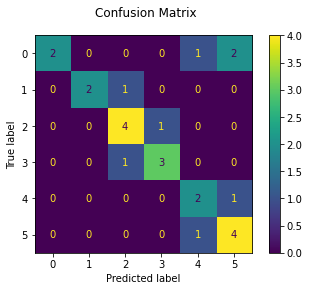

In [44]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()